In [1]:
import os, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_theme()

In [2]:
# os.chdir('D:\Work\B2B\Aditya Group\Module 02 Lectures\Lecture 02')
df = pd.read_csv('../dataset/bank_data.csv',sep=';')
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no


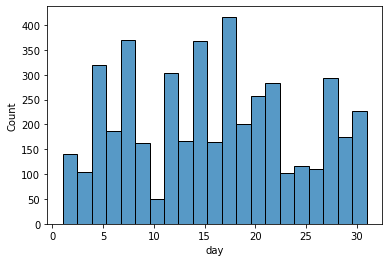

In [3]:
sns.histplot(df['day']);

In [4]:
#sns.histplot

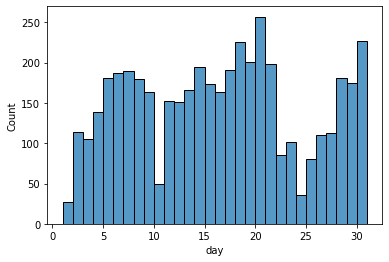

In [5]:
sns.histplot(df['day'],bins=30);

In [6]:
#df['day']>30

In [7]:
sum(df['day']>=30)

227

In [8]:
sum(df['day']<5)

385

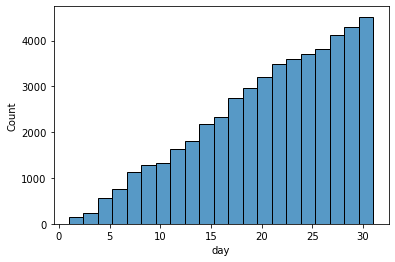

In [9]:
sns.histplot(df['day'],cumulative=True);

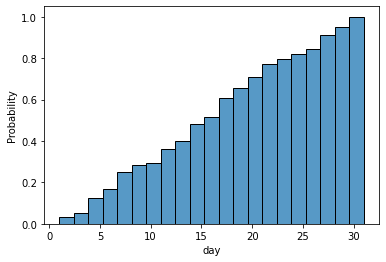

In [10]:
sns.histplot(df['day'],cumulative=True,stat='probability');

### Getting count of unique values in a Categorical variable

In [11]:
df['day'].nunique()

31

### Getting unique values in a Categorical variable

In [12]:
df['day'].unique()

array([19, 11, 16,  3,  5, 23, 14,  6, 17, 20, 13, 30, 29, 27,  7, 18, 12,
       21, 26, 22,  2,  4, 15,  8, 28,  9,  1, 10, 31, 25, 24])

In [13]:
df['balance'].nunique()

2353

## Creating Sample DataFrame using Dictionary

In [14]:
import random
dic = { 'Class':[random.choice(['10th Std','11th Std','12th Std']) for i in range(7)],
       'Rollno':random.sample(range(10,30),7),
       'Gender':[random.choice(['M','F']) for i in range(7)],
      'English':[random.randint(10,100) for i in range(7)],
      'Physics':[random.randint(10,100) for i in range(7)],
    'Chemistry':[random.randint(10,100) for i in range(7)],
  'Scholorship':[random.choice([True,False]) for i in range(7)]}
df = pd.DataFrame(dic)
df

,Class,Rollno,Gender,English,Physics,Chemistry,Scholorship
0,12th Std,13,F,99,88,99,False
1,12th Std,27,F,37,64,39,True
2,11th Std,11,M,78,99,64,True
3,11th Std,19,M,70,31,59,False
4,12th Std,20,M,93,36,65,False
5,12th Std,29,F,73,18,26,True
6,11th Std,18,F,88,69,93,False


In [15]:
df['Chemistry']>80

0     True
1    False
2    False
3    False
4    False
5    False
6     True
Name: Chemistry, dtype: bool

In [16]:
sum(df['Chemistry']>80)

2

In [17]:
df.head(3)

,Class,Rollno,Gender,English,Physics,Chemistry,Scholorship
0,12th Std,13,F,99,88,99,False
1,12th Std,27,F,37,64,39,True
2,11th Std,11,M,78,99,64,True


In [18]:
# os.chdir('D:\Work\B2B\Aditya Group\Module 02 Lectures\Lecture 02')
df = pd.read_csv('../dataset/bank_data.csv',sep=';')
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no


# Applying Multiple Criteria on a DataFrame

In [19]:
criteria_1 = df['balance'] > 1000
criteria_2 = df['poutcome'] == 'success'
criteria_3 = df['job'].isin(['management','retired','entrepreneur'])

In [20]:
df['job'].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [21]:
criteria_3.sum()

1367

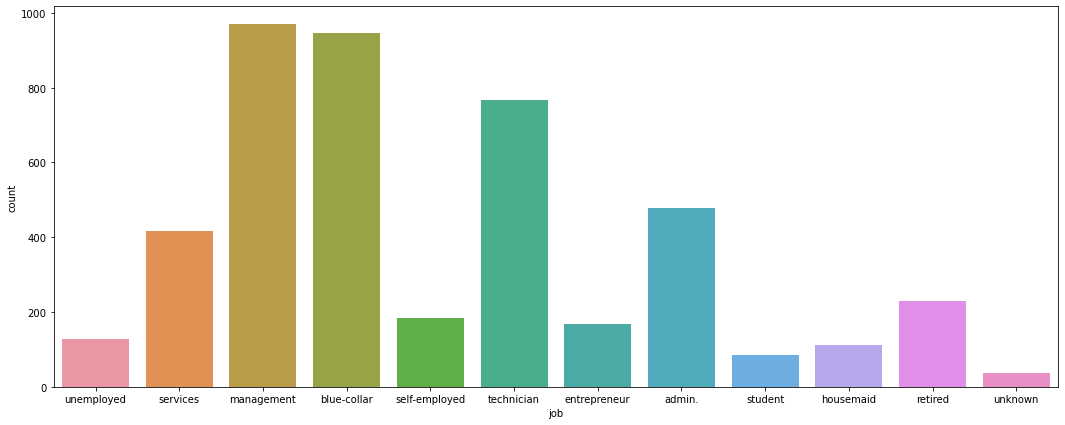

In [22]:
plt.figure(figsize=(18,7))
sns.countplot(data=df, x='job');

/Users/siddharthkothotya/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


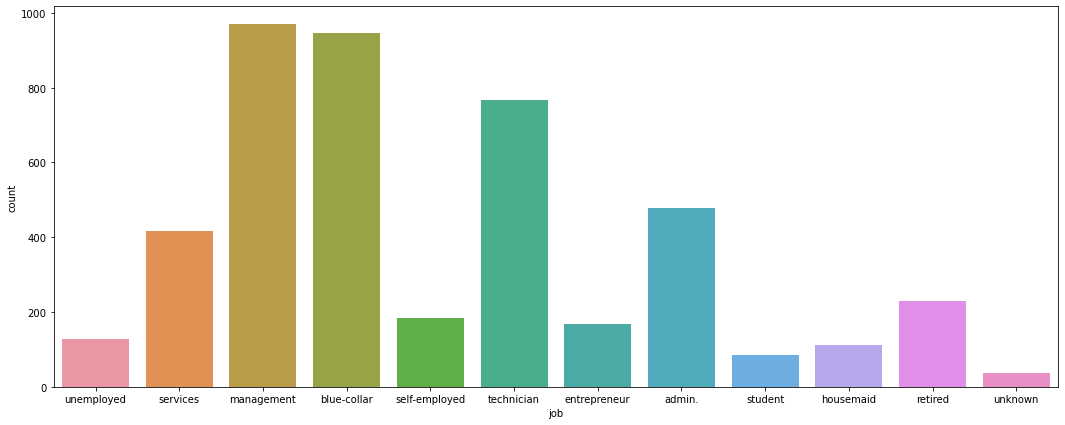

In [23]:
plt.figure(figsize=(18,7))
sns.countplot(df['job']);

In [24]:
df['job'].value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

#### Applying the three criteria with AND conditions

In [25]:
criteria_1 & criteria_2 & criteria_3

0       False
1       False
2       False
3       False
4       False
        ...  
4516    False
4517    False
4518    False
4519    False
4520    False
Length: 4521, dtype: bool

In [26]:
sum(criteria_1 & criteria_2 & criteria_3)

19

In [27]:
#----------Checking the shape of sub-set DataFrame-----------
df[criteria_1 & criteria_2 & criteria_3].shape

(19, 17)

In [28]:
df[criteria_1 & criteria_2 & criteria_3]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
199,75,retired,married,secondary,no,3771,no,no,telephone,15,apr,185,1,181,2,success,yes
323,38,management,married,tertiary,no,1199,no,no,cellular,4,aug,178,1,1,1,success,yes
338,63,retired,married,primary,no,1084,no,no,cellular,14,oct,201,1,183,1,success,no
347,55,management,married,primary,no,2587,no,no,cellular,4,sep,328,2,94,2,success,yes
477,77,retired,married,tertiary,no,7802,no,no,telephone,4,may,421,1,92,2,success,yes
1056,63,entrepreneur,married,secondary,no,3904,no,no,telephone,4,aug,250,2,187,2,success,yes
1060,48,management,married,tertiary,no,1147,no,no,cellular,5,aug,389,1,64,2,success,yes
1216,29,management,single,tertiary,no,15459,no,no,cellular,26,may,245,3,97,7,success,no
1303,42,management,married,unknown,no,1519,no,no,cellular,19,oct,230,1,92,1,success,yes
1442,73,retired,married,primary,no,1388,no,no,cellular,20,jul,146,3,190,3,success,no


### Varying how the three criteria can be applied

In [29]:
sum(criteria_1 & criteria_2 | criteria_3)

1409

In [30]:
sum(criteria_1 | criteria_2 & criteria_3)

1499

In [31]:
sum(criteria_1 | (criteria_2 & criteria_3) )

1499

In [32]:
sum(criteria_1 & (criteria_2 | criteria_3) )

558

## Creating a sub-set DataFrame

In [33]:
subset_1 = df[criteria_1 & criteria_2 & criteria_3]
subset_1.shape

(19, 17)

In [34]:
subset_1.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
199,75,retired,married,secondary,no,3771,no,no,telephone,15,apr,185,1,181,2,success,yes
323,38,management,married,tertiary,no,1199,no,no,cellular,4,aug,178,1,1,1,success,yes
338,63,retired,married,primary,no,1084,no,no,cellular,14,oct,201,1,183,1,success,no


In [35]:
subset_1['y']

199     yes
323     yes
338      no
347     yes
477     yes
1056    yes
1060    yes
1216     no
1303    yes
1442     no
1754    yes
2070     no
3202    yes
3331    yes
3589    yes
3695    yes
3978    yes
4093    yes
4160    yes
Name: y, dtype: object

In [36]:
subset_1['y'].value_counts()

yes    15
no      4
Name: y, dtype: int64

In [37]:
subset_1['y'].value_counts(normalize=True)

yes    0.789474
no     0.210526
Name: y, dtype: float64

In [38]:
subset_1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
199,75,retired,married,secondary,no,3771,no,no,telephone,15,apr,185,1,181,2,success,yes
323,38,management,married,tertiary,no,1199,no,no,cellular,4,aug,178,1,1,1,success,yes
338,63,retired,married,primary,no,1084,no,no,cellular,14,oct,201,1,183,1,success,no
347,55,management,married,primary,no,2587,no,no,cellular,4,sep,328,2,94,2,success,yes
477,77,retired,married,tertiary,no,7802,no,no,telephone,4,may,421,1,92,2,success,yes


#### Viewing just the relevant columns in this Subset

In [39]:
subset_1[['duration','campaign','pdays','poutcome','previous','y']]

,duration,campaign,pdays,poutcome,previous,y
199,185,1,181,success,2,yes
323,178,1,1,success,1,yes
338,201,1,183,success,1,no
347,328,2,94,success,2,yes
477,421,1,92,success,2,yes
1056,250,2,187,success,2,yes
1060,389,1,64,success,2,yes
1216,245,3,97,success,7,no
1303,230,1,92,success,1,yes
1442,146,3,190,success,3,no


#### Another way

In [40]:
my_cols = ['duration','campaign','pdays','poutcome','previous','y']
subset_1[my_cols]

,duration,campaign,pdays,poutcome,previous,y
199,185,1,181,success,2,yes
323,178,1,1,success,1,yes
338,201,1,183,success,1,no
347,328,2,94,success,2,yes
477,421,1,92,success,2,yes
1056,250,2,187,success,2,yes
1060,389,1,64,success,2,yes
1216,245,3,97,success,7,no
1303,230,1,92,success,1,yes
1442,146,3,190,success,3,no


In [41]:
subset_1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
199,75,retired,married,secondary,no,3771,no,no,telephone,15,apr,185,1,181,2,success,yes
323,38,management,married,tertiary,no,1199,no,no,cellular,4,aug,178,1,1,1,success,yes
338,63,retired,married,primary,no,1084,no,no,cellular,14,oct,201,1,183,1,success,no
347,55,management,married,primary,no,2587,no,no,cellular,4,sep,328,2,94,2,success,yes
477,77,retired,married,tertiary,no,7802,no,no,telephone,4,may,421,1,92,2,success,yes


#### Following selection of Columns is not possible

In [44]:
subset_1[['duration':'y']]

SyntaxError: invalid syntax (520228499.py, line 1)

In [ ]:
subset_1['duration':'y']

# Indexer .loc (and .iloc)

In [45]:
#-------------subset_1[['duration':'y']]

In [46]:
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no


#### Single row selection using .loc Indexer - Gives a Series with DataFrame Header as Index

In [47]:
df.loc[10]

age                 39
job           services
marital        married
education    secondary
default             no
balance           9374
housing            yes
loan                no
contact        unknown
day                 20
month              may
duration           273
campaign             1
pdays               -1
previous             0
poutcome       unknown
y                   no
Name: 10, dtype: object

#### Multiple rows selection (Range) using .loc Indexer

In [48]:
df.loc[10:14]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
10,39,services,married,secondary,no,9374,yes,no,unknown,20,may,273,1,-1,0,unknown,no
11,43,admin.,married,secondary,no,264,yes,no,cellular,17,apr,113,2,-1,0,unknown,no
12,36,technician,married,tertiary,no,1109,no,no,cellular,13,aug,328,2,-1,0,unknown,no
13,20,student,single,secondary,no,502,no,no,cellular,30,apr,261,1,-1,0,unknown,yes
14,31,blue-collar,married,secondary,no,360,yes,yes,cellular,29,jan,89,1,241,1,failure,no


#### Multiple rows selection (Discrete) using .loc Indexer

In [49]:
df.loc[[90,1,0,34]]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
90,39,blue-collar,married,primary,no,111,no,no,cellular,18,nov,201,2,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
34,49,technician,married,tertiary,no,1235,no,no,cellular,13,aug,354,3,-1,0,unknown,yes


#### Single column selection using .loc Indexer

In [50]:
df.loc[:,'y']

0       no
1       no
2       no
3       no
4       no
        ..
4516    no
4517    no
4518    no
4519    no
4520    no
Name: y, Length: 4521, dtype: object

#### Multiple columns (discrete) selection using .loc indexer

In [51]:
df.loc[:,['age','education','pdays','job']]

,age,education,pdays,job
0,30,primary,-1,unemployed
1,33,secondary,339,services
2,35,tertiary,330,management
3,30,tertiary,-1,management
4,59,secondary,-1,blue-collar
...,...,...,...,...
4516,33,secondary,-1,services
4517,57,tertiary,-1,self-employed
4518,57,secondary,-1,technician
4519,28,secondary,211,blue-collar


#### Multiple columns (range) selection using .loc indexer

In [52]:
df.loc[:,'age':'education']

,age,job,marital,education
0,30,unemployed,married,primary
1,33,services,married,secondary
2,35,management,single,tertiary
3,30,management,married,tertiary
4,59,blue-collar,married,secondary
...,...,...,...,...
4516,33,services,married,secondary
4517,57,self-employed,married,tertiary
4518,57,technician,married,secondary
4519,28,blue-collar,married,secondary


#### Multiple Rows and Multiple Columns selection using .loc Indexer

In [53]:
df.loc[[90,1,0,34],['age','education','pdays','job']]

,age,education,pdays,job
90,39,primary,-1,blue-collar
1,33,secondary,339,services
0,30,primary,-1,unemployed
34,49,tertiary,-1,technician


In [54]:
df.loc[5:10,['age','education','pdays','job']]

,age,education,pdays,job
5,35,tertiary,176,management
6,36,tertiary,330,self-employed
7,39,secondary,-1,technician
8,41,tertiary,-1,entrepreneur
9,43,primary,147,services
10,39,secondary,-1,services


# Simple operations on Variables of different type (for Self-Study)
* Numeric
* Object/String
* Dates

In [55]:
# os.chdir('D:\Work\B2B\Aditya Group\Module 02 Lectures\Lecture 04')

In [55]:
edf = pd.read_csv('../dataset/hrdata.csv')
edf.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary_previous,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,52139,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,93546,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,61278,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,62828,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,01-03-2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,49663,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,02-01-2016,0,2


In [56]:
#-----------To display all the columns in the DataFrame----------
pd.set_option("display.max_columns", None)

In [57]:
edf.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary_previous,Salary_current,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,52139,62506,0,19,Production Technician I,MA,1960,07-10-1983,M,Single,US Citizen,No,White,07-05-2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,93546,104437,1,27,Sr. DBA,MA,2148,05-05-1975,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,61278,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,07-05-2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,62828,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,01-07-2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,01-03-2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,49663,50825,1,19,Production Technician I,MA,2169,09-08-1989,F,Divorced,US Citizen,No,White,07-11-2011,09-06-2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,02-01-2016,0,2


In [58]:
#---------Viewing how variables have been read (notice the dtype of Date Variables)-----------
edf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary_previous             311 non-null    int64  
 10  Salary_current              311 non-null    int64  
 11  Termd                       311 non-null    int64  
 12  PositionID                  311 non-null    int64  
 13  Position                    311 non

### Taking care of Dates variables - reading these as Proper dates

In [60]:
edf = pd.read_csv('../dataset/hrdata.csv',parse_dates=['DOB','DateofHire','DateofTermination','LastPerformanceReview_Date'])

In [61]:
#--------Checking again the dtype of all variables (notice now, how the Date Variables have been read)-----------
#--------Dates show with dtype of datetime-------
edf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee_Name               311 non-null    object        
 1   EmpID                       311 non-null    int64         
 2   MarriedID                   311 non-null    int64         
 3   MaritalStatusID             311 non-null    int64         
 4   GenderID                    311 non-null    int64         
 5   EmpStatusID                 311 non-null    int64         
 6   DeptID                      311 non-null    int64         
 7   PerfScoreID                 311 non-null    int64         
 8   FromDiversityJobFairID      311 non-null    int64         
 9   Salary_previous             311 non-null    int64         
 10  Salary_current              311 non-null    int64         
 11  Termd                       311 non-null    int64         

## Operations on Numeric variables

In [62]:
#--------------Viewing only the Numeric variables-------------
edf.select_dtypes(include='number')

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary_previous,Salary_current,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
0,10026,0,0,1,1,5,4,0,52139,62506,0,19,1960,22.0,4.60,5,0,0,1
1,10084,1,1,1,5,3,3,0,93546,104437,1,27,2148,4.0,4.96,3,6,0,17
2,10196,1,1,0,5,5,3,0,61278,64955,1,20,1810,20.0,3.02,3,0,0,3
3,10088,1,1,0,1,5,3,0,62828,64991,0,19,1886,16.0,4.84,5,0,0,15
4,10069,0,2,0,5,5,3,0,49663,50825,1,19,2169,39.0,5.00,4,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,10135,0,0,1,1,5,3,0,53105,65893,0,20,1810,20.0,4.07,4,0,0,13
307,10301,0,0,0,5,5,1,0,42212,48513,1,19,2458,12.0,3.20,2,0,5,4
308,10010,0,0,0,1,3,4,0,184376,220450,0,6,2067,2.0,4.60,5,6,0,16
309,10043,0,0,0,1,3,3,0,77745,89292,0,9,2148,4.0,5.00,3,5,0,11


### 01. Simple Addition
* Scalar 100 gets added to all the values in Series

In [63]:
edf['Salary_current']+100

0       62606
1      104537
2       65055
3       65091
4       50925
        ...  
306     65993
307     48613
308    220550
309     89392
310     45146
Name: Salary_current, Length: 311, dtype: int64

### 02. Simple Division

In [64]:
edf['Salary_current']/12

0       5208.833333
1       8703.083333
2       5412.916667
3       5415.916667
4       4235.416667
           ...     
306     5491.083333
307     4042.750000
308    18370.833333
309     7441.000000
310     3753.833333
Name: Salary_current, Length: 311, dtype: float64

### 03. Simple Difference

In [65]:
edf['Salary_current']-edf['Salary_previous']

0      10367
1      10891
2       3677
3       2163
4       1162
       ...  
306    12788
307     6301
308    36074
309    11547
310     4045
Length: 311, dtype: int64

### 04. Multiple operations

In [66]:
(edf['Salary_current']-edf['Salary_previous'])/edf['Salary_previous']

0      0.198834
1      0.116424
2      0.060005
3      0.034427
4      0.023398
         ...   
306    0.240806
307    0.149270
308    0.195655
309    0.148524
310    0.098656
Length: 311, dtype: float64

## Operations on Object/ String variables
https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html

In [67]:
#--------------Viewing only the Numeric variables-------------
edf.select_dtypes(include='object').head()

,Employee_Name,Position,State,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore
0,"Adinolfi, Wilson K",Production Technician I,MA,M,Single,US Citizen,No,White,N/A-StillEmployed,Active,Production,Michael Albert,LinkedIn,Exceeds
1,"Ait Sidi, Karthikeyan",Sr. DBA,MA,M,Married,US Citizen,No,White,career change,Voluntarily Terminated,IT/IS,Simon Roup,Indeed,Fully Meets
2,"Akinkuolie, Sarah",Production Technician II,MA,F,Married,US Citizen,No,White,hours,Voluntarily Terminated,Production,Kissy Sullivan,LinkedIn,Fully Meets
3,"Alagbe,Trina",Production Technician I,MA,F,Married,US Citizen,No,White,N/A-StillEmployed,Active,Production,Elijiah Gray,Indeed,Fully Meets
4,"Anderson, Carol",Production Technician I,MA,F,Divorced,US Citizen,No,White,return to school,Voluntarily Terminated,Production,Webster Butler,Google Search,Fully Meets


### 01. Change to Upper Case
* 'str' is an accessor object which allows access to the properties of an Object variable

In [68]:
edf['Department'].str.upper()

0      PRODUCTION       
1                  IT/IS
2      PRODUCTION       
3      PRODUCTION       
4      PRODUCTION       
             ...        
306    PRODUCTION       
307    PRODUCTION       
308                IT/IS
309                IT/IS
310    PRODUCTION       
Name: Department, Length: 311, dtype: object

### 02. Find length of string

In [69]:
edf['Employee_Name'].str.len()

0      19
1      24
2      17
3      12
4      16
       ..
306    14
307    18
308    16
309    11
310    13
Name: Employee_Name, Length: 311, dtype: int64

### 03. Concatenating Two string variables

In [70]:
edf['Employee_Name']+ " | " +edf['Position']

0      Adinolfi, Wilson  K | Production Technician I
1                 Ait Sidi, Karthikeyan    | Sr. DBA
2       Akinkuolie, Sarah | Production Technician II
3             Alagbe,Trina | Production Technician I
4         Anderson, Carol  | Production Technician I
                           ...                      
306        Woodson, Jason | Production Technician II
307     Ybarra, Catherine  | Production Technician I
308                           Zamora, Jennifer | CIO
309                       Zhou, Julia | Data Analyst
310          Zima, Colleen | Production Technician I
Length: 311, dtype: object

### 04. Splitting a single variable to multiple

In [71]:
(edf['Employee_Name']+ " | " +edf['Position']).str.split("|")

0      [Adinolfi, Wilson  K ,  Production Technician I]
1                 [Ait Sidi, Karthikeyan    ,  Sr. DBA]
2       [Akinkuolie, Sarah ,  Production Technician II]
3             [Alagbe,Trina ,  Production Technician I]
4         [Anderson, Carol  ,  Production Technician I]
                             ...                       
306        [Woodson, Jason ,  Production Technician II]
307     [Ybarra, Catherine  ,  Production Technician I]
308                           [Zamora, Jennifer ,  CIO]
309                       [Zhou, Julia ,  Data Analyst]
310          [Zima, Colleen ,  Production Technician I]
Length: 311, dtype: object

#### By default, the splitted information is stored in a Series

In [72]:
type((edf['Employee_Name']+ " | " +edf['Position']).str.split("|"))

pandas.core.series.Series

#### By using expand=True, the splitted information can be stored in Two separate variables (.i.e a DataFrame)

In [73]:
type((edf['Employee_Name']+ " | " +edf['Position']).str.split("|",expand=True))

pandas.core.frame.DataFrame

In [74]:
#-------------Viewing the output with expand=True---------
(edf['Employee_Name']+ " | " +edf['Position']).str.split("|",expand=True)

,0,1
0,"Adinolfi, Wilson K",Production Technician I
1,"Ait Sidi, Karthikeyan",Sr. DBA
2,"Akinkuolie, Sarah",Production Technician II
3,"Alagbe,Trina",Production Technician I
4,"Anderson, Carol",Production Technician I
...,...,...
306,"Woodson, Jason",Production Technician II
307,"Ybarra, Catherine",Production Technician I
308,"Zamora, Jennifer",CIO
309,"Zhou, Julia",Data Analyst


#### Creating an Empty DataFrame - .i.e with 0 rows and 0 columns

In [75]:
empty = pd.DataFrame()
empty.shape

(0, 0)

#### Storing the earlier splitted information as new variables in this empty DataFrame

In [76]:
empty[['Full Name','Position']] = (edf['Employee_Name']+ " | " +edf['Position']).str.split("|",expand=True)

In [77]:
empty.shape

(311, 2)

In [78]:
empty

,Full Name,Position
0,"Adinolfi, Wilson K",Production Technician I
1,"Ait Sidi, Karthikeyan",Sr. DBA
2,"Akinkuolie, Sarah",Production Technician II
3,"Alagbe,Trina",Production Technician I
4,"Anderson, Carol",Production Technician I
...,...,...
306,"Woodson, Jason",Production Technician II
307,"Ybarra, Catherine",Production Technician I
308,"Zamora, Jennifer",CIO
309,"Zhou, Julia",Data Analyst


### 05. Replace a string

In [79]:
edf['TermReason'].head()

0    N/A-StillEmployed
1        career change
2                hours
3    N/A-StillEmployed
4     return to school
Name: TermReason, dtype: object

In [80]:
#---------------Replacing "N/A-" with empty space-------
edf['TermReason'].str.replace("N/A-","").head()

0       StillEmployed
1       career change
2               hours
3       StillEmployed
4    return to school
Name: TermReason, dtype: object

In [81]:
#-------------Adding extra space after the string "Still"--------
edf['TermReason'].str.replace("Still","Still ").head()

0    N/A-Still Employed
1         career change
2                 hours
3    N/A-Still Employed
4      return to school
Name: TermReason, dtype: object

### 06. String that starts or Ends with a sub-string

In [82]:
edf[edf['Position'].str.startswith("Production")]['Position'].unique()

array(['Production Technician I', 'Production Technician II',
       'Production Manager'], dtype=object)

## Operations on Date variables

In [83]:
#--------------Viewing only the Datetime variables-------------
edf.select_dtypes(include='datetime').head()
#---------NaT means Not a Time---

,DOB,DateofHire,DateofTermination,LastPerformanceReview_Date
0,1983-07-10,2011-07-05,NaT,2019-01-17
1,1975-05-05,2015-03-30,2016-06-16,2016-02-24
2,1988-09-19,2011-07-05,2012-09-24,2012-05-15
3,1988-09-27,2008-01-07,NaT,2019-01-03
4,1989-09-08,2011-07-11,2016-09-06,2016-02-01


### 01. Extracting the Year
* 'dt' is an accessor object which allows access to the properties of a Datetime variable

In [84]:
edf['DOB'].dt.year

0      1983
1      1975
2      1988
3      1988
4      1989
       ... 
306    1985
307    1982
308    1979
309    1979
310    1978
Name: DOB, Length: 311, dtype: int64

### 02. Extracting the Month

In [85]:
edf['DOB'].dt.month

0      7
1      5
2      9
3      9
4      9
      ..
306    5
307    5
308    8
309    2
310    8
Name: DOB, Length: 311, dtype: int64

### 03. Extracting the Day

In [86]:
edf['DOB'].dt.day

0      10
1       5
2      19
3      27
4       8
       ..
306    11
307     4
308    30
309    24
310    17
Name: DOB, Length: 311, dtype: int64

### 04. Creating a new variable with today's date

In [87]:
edf['today']=pd.to_datetime('today')

In [88]:
#---------------Viewing all date variables again----------
edf.select_dtypes(include='datetime').head()

,DOB,DateofHire,DateofTermination,LastPerformanceReview_Date,today
0,1983-07-10,2011-07-05,NaT,2019-01-17,2022-03-25 12:21:06.652631
1,1975-05-05,2015-03-30,2016-06-16,2016-02-24,2022-03-25 12:21:06.652631
2,1988-09-19,2011-07-05,2012-09-24,2012-05-15,2022-03-25 12:21:06.652631
3,1988-09-27,2008-01-07,NaT,2019-01-03,2022-03-25 12:21:06.652631
4,1989-09-08,2011-07-11,2016-09-06,2016-02-01,2022-03-25 12:21:06.652631


### 05. Creating a new column with any date

In [89]:
edf['somedate']=pd.to_datetime('2021-11-27',format="%Y-%m-%d")
edf.select_dtypes(include='datetime').head()

,DOB,DateofHire,DateofTermination,LastPerformanceReview_Date,today,somedate
0,1983-07-10,2011-07-05,NaT,2019-01-17,2022-03-25 12:21:06.652631,2021-11-27
1,1975-05-05,2015-03-30,2016-06-16,2016-02-24,2022-03-25 12:21:06.652631,2021-11-27
2,1988-09-19,2011-07-05,2012-09-24,2012-05-15,2022-03-25 12:21:06.652631,2021-11-27
3,1988-09-27,2008-01-07,NaT,2019-01-03,2022-03-25 12:21:06.652631,2021-11-27
4,1989-09-08,2011-07-11,2016-09-06,2016-02-01,2022-03-25 12:21:06.652631,2021-11-27


### 06. Computing dates difference

In [90]:
edf['today']-edf['DOB']
#------------This gives a timedelta object----

0     14138 days 12:21:06.652631
1     17126 days 12:21:06.652631
2     12240 days 12:21:06.652631
3     12232 days 12:21:06.652631
4     11886 days 12:21:06.652631
                 ...            
306   13467 days 12:21:06.652631
307   14570 days 12:21:06.652631
308   15548 days 12:21:06.652631
309   15735 days 12:21:06.652631
310   15926 days 12:21:06.652631
Length: 311, dtype: timedelta64[ns]

### 07. Finding number of days from a Timedelta object

In [91]:
(edf['today']-edf['DOB']).dt.days

0      14138
1      17126
2      12240
3      12232
4      11886
       ...  
306    13467
307    14570
308    15548
309    15735
310    15926
Length: 311, dtype: int64